In [ ]:
# module

In [78]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [79]:
# 폰트설정 (맥)
from matplotlib import font_manager
plt.rcParams["font.family"] = 'NanumGothicCoding'
from matplotlib import rc
rc('font', family="Arial Unicode MS")

In [80]:
# 폰트 설정 (윈도우)
from matplotlib import rc

rc('font', family='Malgun Gothic')

# 부동산 Data 불러오기

In [75]:
train = pd.read_csv('datas/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [82]:
pd.to_datetime(df1['transaction_year_month'])

0         1970-01-01 00:00:00.000200801
1         1970-01-01 00:00:00.000200801
2         1970-01-01 00:00:00.000200801
3         1970-01-01 00:00:00.000200801
4         1970-01-01 00:00:00.000200801
                       ...             
1216548   1970-01-01 00:00:00.000201711
1216549   1970-01-01 00:00:00.000201711
1216550   1970-01-01 00:00:00.000201711
1216551   1970-01-01 00:00:00.000201711
1216552   1970-01-01 00:00:00.000201711
Name: transaction_year_month, Length: 1216553, dtype: datetime64[ns]

In [84]:
df1["transaction_year_datetime"] = pd.to_datetime(df1['transaction_year_month'])
df1.tail(1)

,city,dong,transaction_real_price,transaction_id,apartment_id,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,P/m^2,transaction_year_datetime
1216552,부산광역시,정관읍 용수리,28800,1234827,9578,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,16,338.854226,1970-01-01 00:00:00.000201711


In [89]:
df1["year"] = df1["transaction_year_datetime"].dt.year
df1["month"] = df1["transaction_year_datetime"].dt.month
df1.tail(1)

,city,dong,transaction_real_price,transaction_id,apartment_id,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,P/m^2,transaction_year_datetime,year,month
1216552,부산광역시,정관읍 용수리,28800,1234827,9578,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,16,338.854226,1970-01-01 00:00:00.000201711,1970,1


In [93]:
df1['year']-df1['year_of_completion']

0         -32
1          -3
2         -37
3         -33
4         -34
           ..
1216548   -42
1216549   -42
1216550   -42
1216551   -38
1216552   -42
Length: 1216553, dtype: int64

In [91]:
df1

,city,dong,transaction_real_price,transaction_id,apartment_id,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,P/m^2,transaction_year_datetime,year,month
0,서울특별시,신교동,37500,0,7622,6-13,신현(101동),신교동 6-13 신현(101동),84.8200,2002,200801,21~31,2,442.112709,1970-01-01 00:00:00.000200801,1970,1
1,서울특별시,필운동,20000,1,5399,142,사직파크맨션,필운동 142 사직파크맨션,99.1700,1973,200801,1~10,6,201.673893,1970-01-01 00:00:00.000200801,1970,1
2,서울특별시,필운동,38500,2,3578,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.7400,2007,200801,1~10,6,454.330895,1970-01-01 00:00:00.000200801,1970,1
3,서울특별시,내수동,118000,3,10957,95,파크팰리스,내수동 95 파크팰리스,146.3900,2003,200801,11~20,15,806.065988,1970-01-01 00:00:00.000200801,1970,1
4,서울특별시,내수동,120000,4,10639,110-15,킹스매너,내수동 110-15 킹스매너,194.4300,2004,200801,21~31,3,617.188705,1970-01-01 00:00:00.000200801,1970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,부산광역시,정관읍 용수리,22000,1234823,9578,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.8245,2012,201711,11~20,3,367.742313,1970-01-01 00:00:00.000201711,1970,1
1216549,부산광역시,정관읍 용수리,30750,1234824,9578,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,7,361.797480,1970-01-01 00:00:00.000201711,1970,1
1216550,부산광역시,정관읍 용수리,29500,1234825,9578,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,9,347.090266,1970-01-01 00:00:00.000201711,1970,1
1216551,부산광역시,정관읍 용수리,26700,1234826,9586,1364,정관신도시롯데캐슬,정관읍 용수리 1364 정관신도시롯데캐슬,101.7400,2008,201711,21~30,7,262.433654,1970-01-01 00:00:00.000201711,1970,1


In [76]:
ll = train['apartment_id'] + train['dong']
ll

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [25]:
train['P/m^2'] = train['transaction_real_price']/train['exclusive_use_area'] # 평당가격 column 추가

In [5]:
train = train[['transaction_id', 'apartment_id', 'city',  'dong', 'jibun', 'apt',
       'addr_kr', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor', 'P/m^2',
       'transaction_real_price']]

## 동별 실가격 정보 내림차순으로 정렬

In [28]:
citi_dong_data = df1["transaction_real_price"].\
                groupby([df1['city'],df1['dong']]).agg(['mean', 'std', 'min', 'max','count'])

((citi_dong_data['count'].sort_values(ascending=False)).reset_index()).head(10)

,city,dong,count
0,서울특별시,상계동,29346
1,부산광역시,좌동,23255
2,부산광역시,화명동,21511
3,부산광역시,용호동,17398
4,서울특별시,중계동,17079
5,서울특별시,신정동,16902
6,부산광역시,연산동,16365
7,부산광역시,다대동,15586
8,서울특별시,창동,15474
9,서울특별시,구로동,14372


In [73]:
train[train['dong']=='상계동']

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,P/m^2,transaction_real_price
176296,176296,816,서울특별시,상계동,1321,건영,상계동 1321 건영,59.91,2003,200801,1~10,6,292.104824,17500
176297,176297,4617,서울특별시,상계동,1265,미주동방벽운,상계동 1265 미주동방벽운,114.92,2000,200801,1~10,10,513.400627,59000
176298,176298,5950,서울특별시,상계동,626,상계주공14(고층),상계동 626 상계주공14(고층),45.90,1989,200801,1~10,1,274.509804,12600
176299,176299,11486,서울특별시,상계동,995,한신4차,상계동 995 한신4차,84.84,1995,200801,1~10,6,338.873173,28750
176300,176300,5947,서울특별시,상계동,652,상계주공11(고층),상계동 652 상계주공11(고층),59.28,1988,200801,1~10,6,354.251012,21000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127493,1130995,5039,서울특별시,상계동,639,보람2단지,상계동 639 보람2단지,68.99,1988,201711,21~30,10,500.072474,34500
1127494,1130996,5952,서울특별시,상계동,624,상계주공16(고층),상계동 624 상계주공16(고층),45.77,1988,201711,21~30,10,535.285121,24500
1127495,1130997,5950,서울특별시,상계동,626,상계주공14(고층),상계동 626 상계주공14(고층),45.90,1989,201711,21~30,11,490.196078,22500
1127496,1130998,5943,서울특별시,상계동,765,상계주공1(고층),상계동 765 상계주공1(고층),41.30,1988,201711,21~30,1,581.113801,24000


## Heatmap을 이용해 상관관계 분석

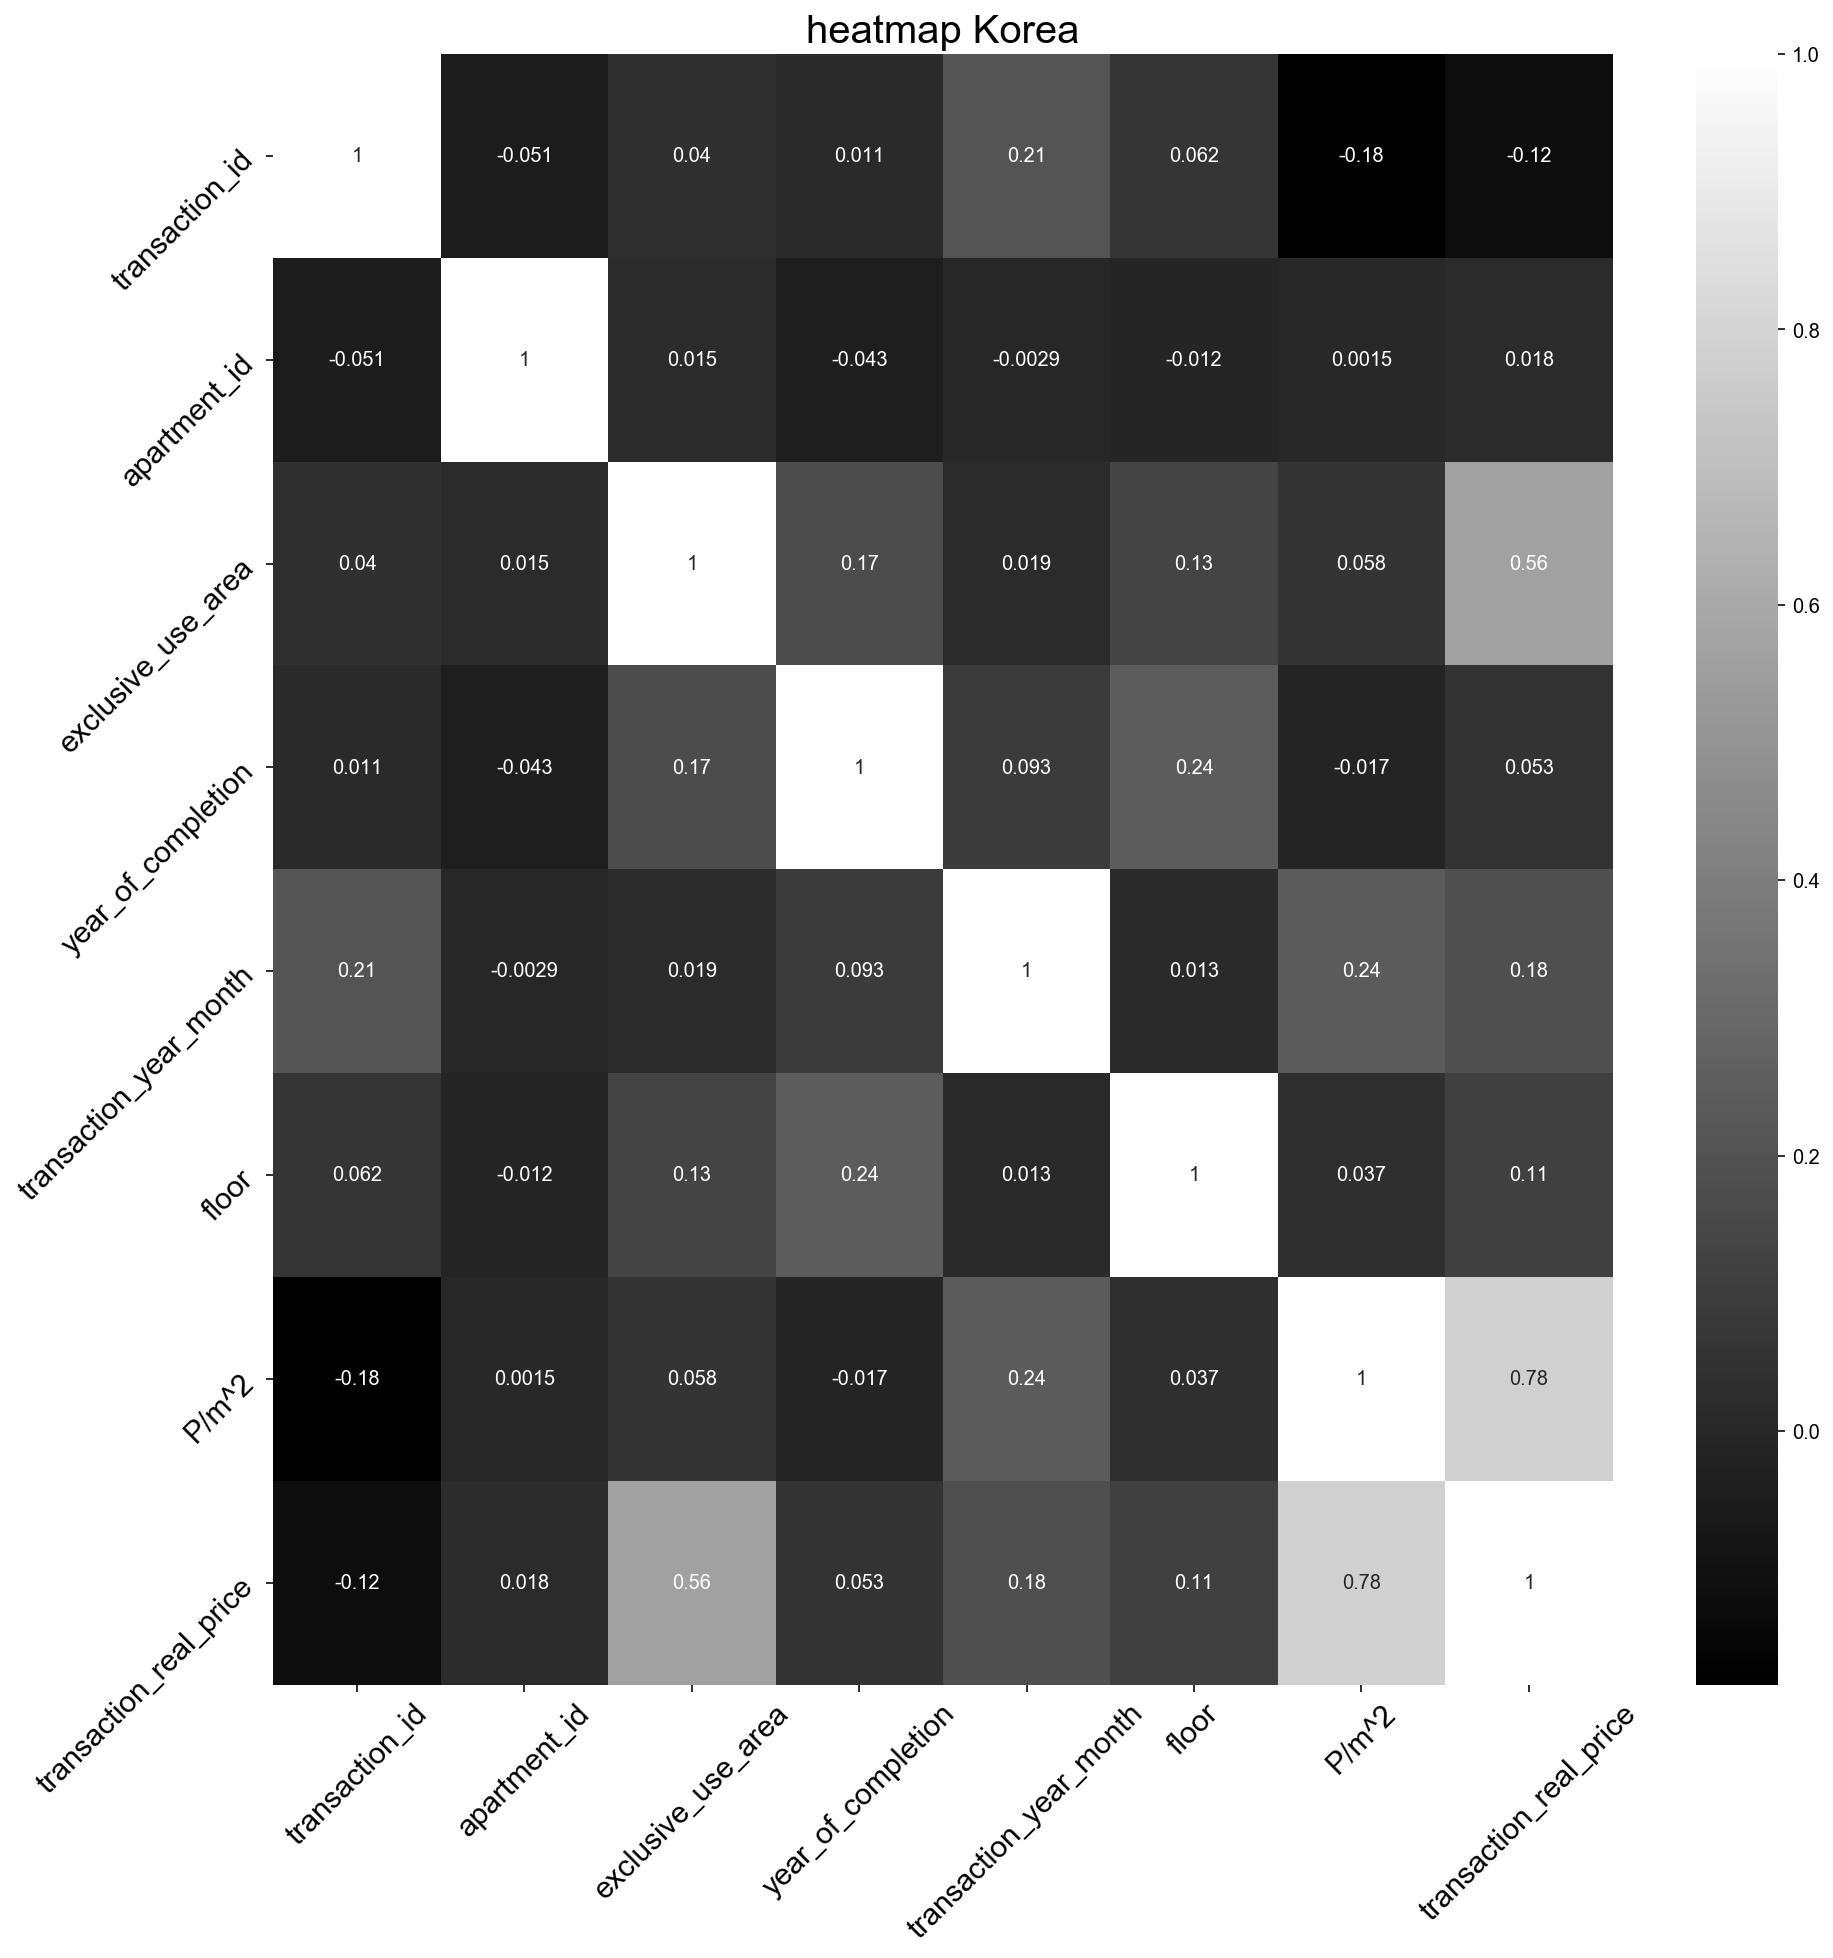

In [65]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), cmap="gray", annot=True)
plt.title('heatmap Korea', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

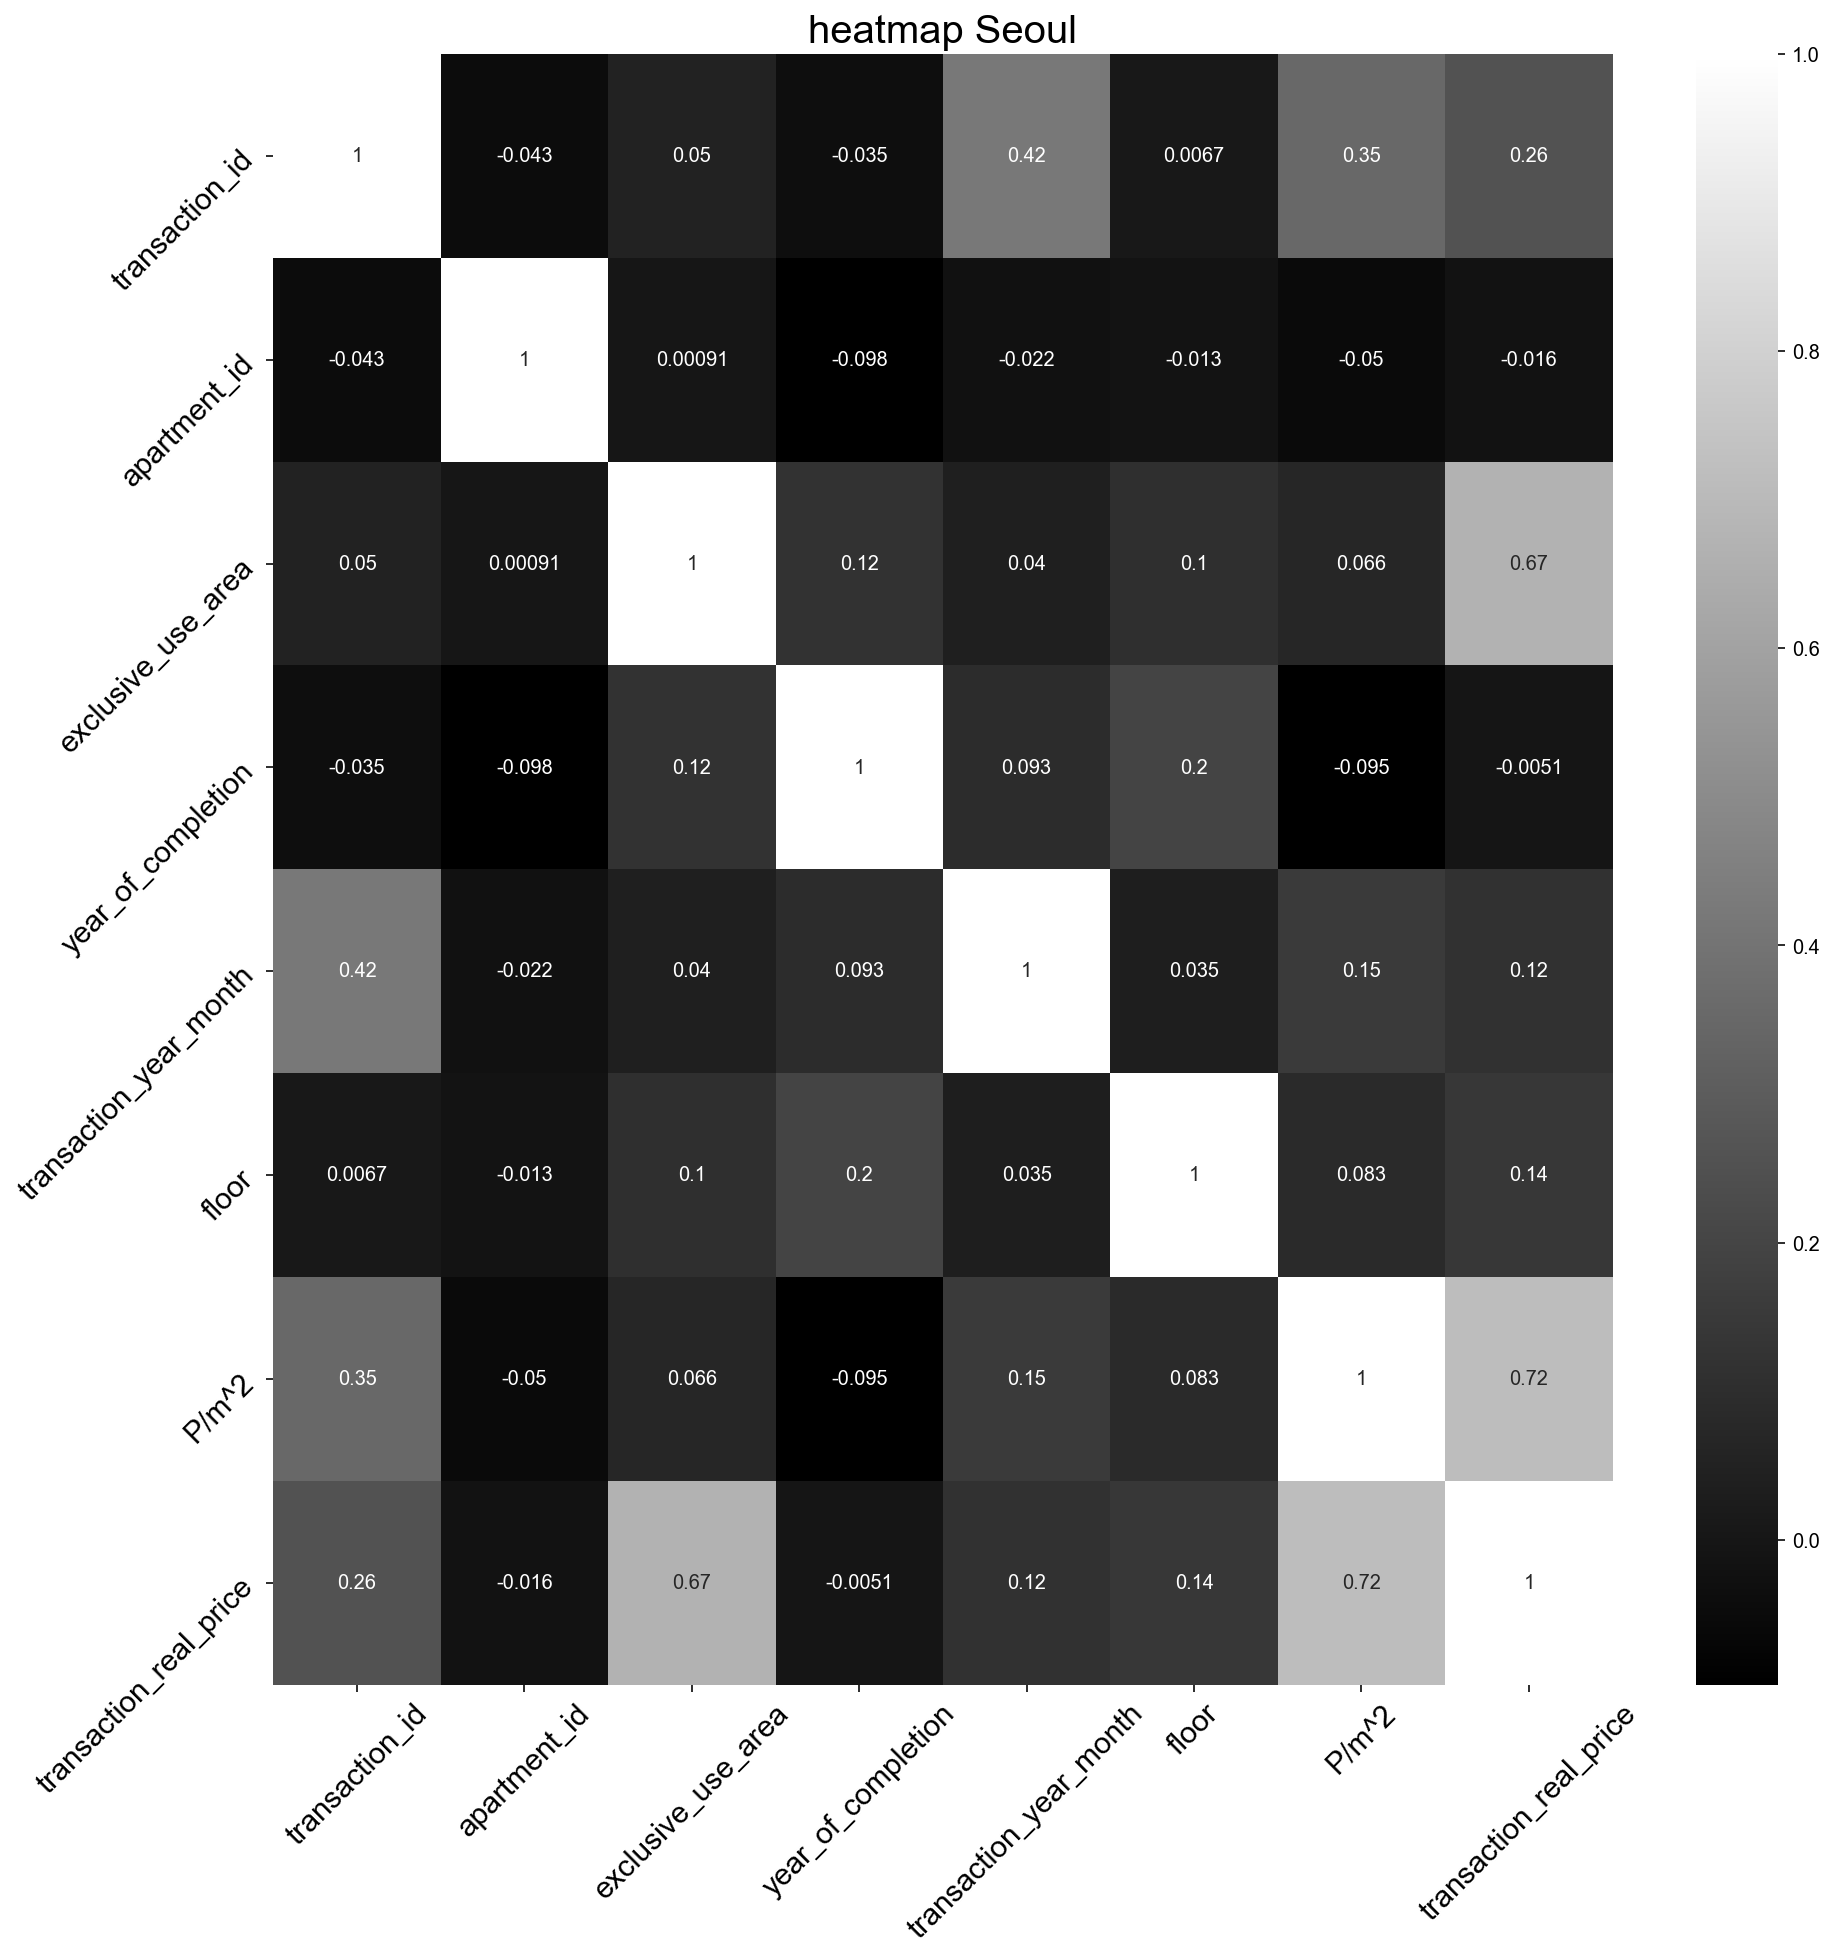

In [68]:
plt.figure(figsize=(15, 15))
sns.heatmap(train[train['city'] == '서울특별시'].corr(), cmap="gray", annot=True)
plt.title('heatmap Seoul', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

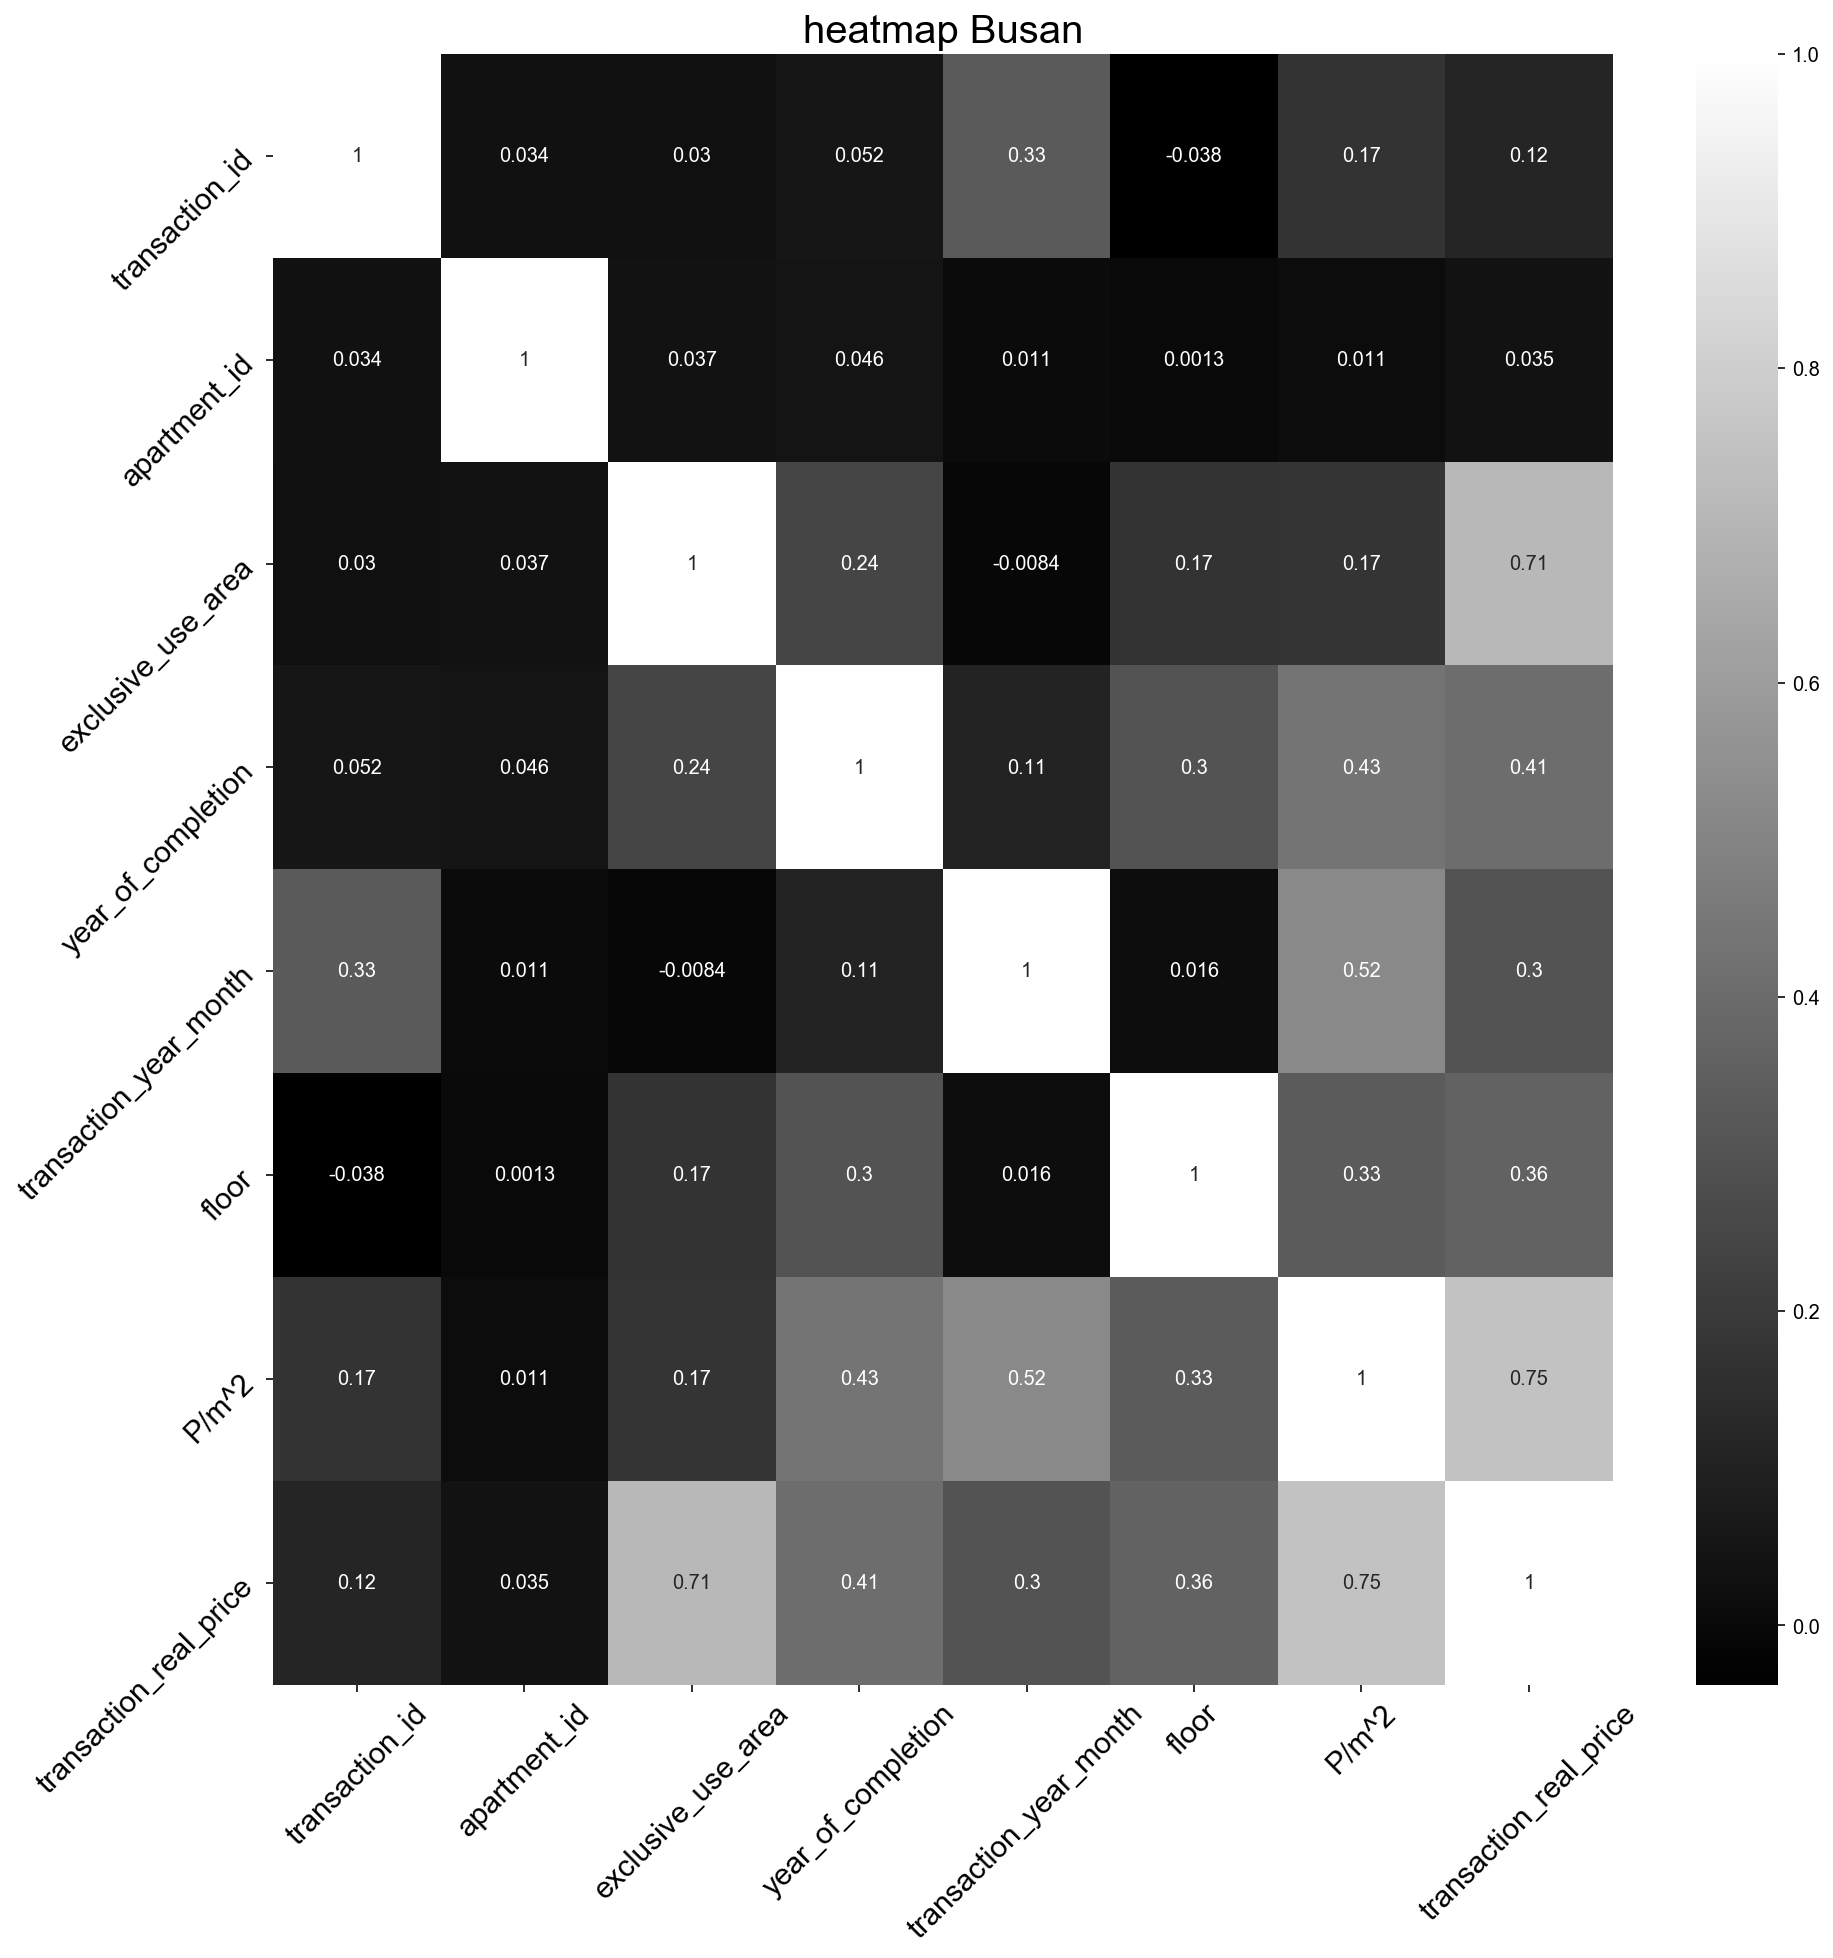

In [69]:
plt.figure(figsize=(15, 15))
sns.heatmap(train[train['city'] == '부산광역시'].corr(), cmap="gray", annot=True)
plt.title('heatmap Busan', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

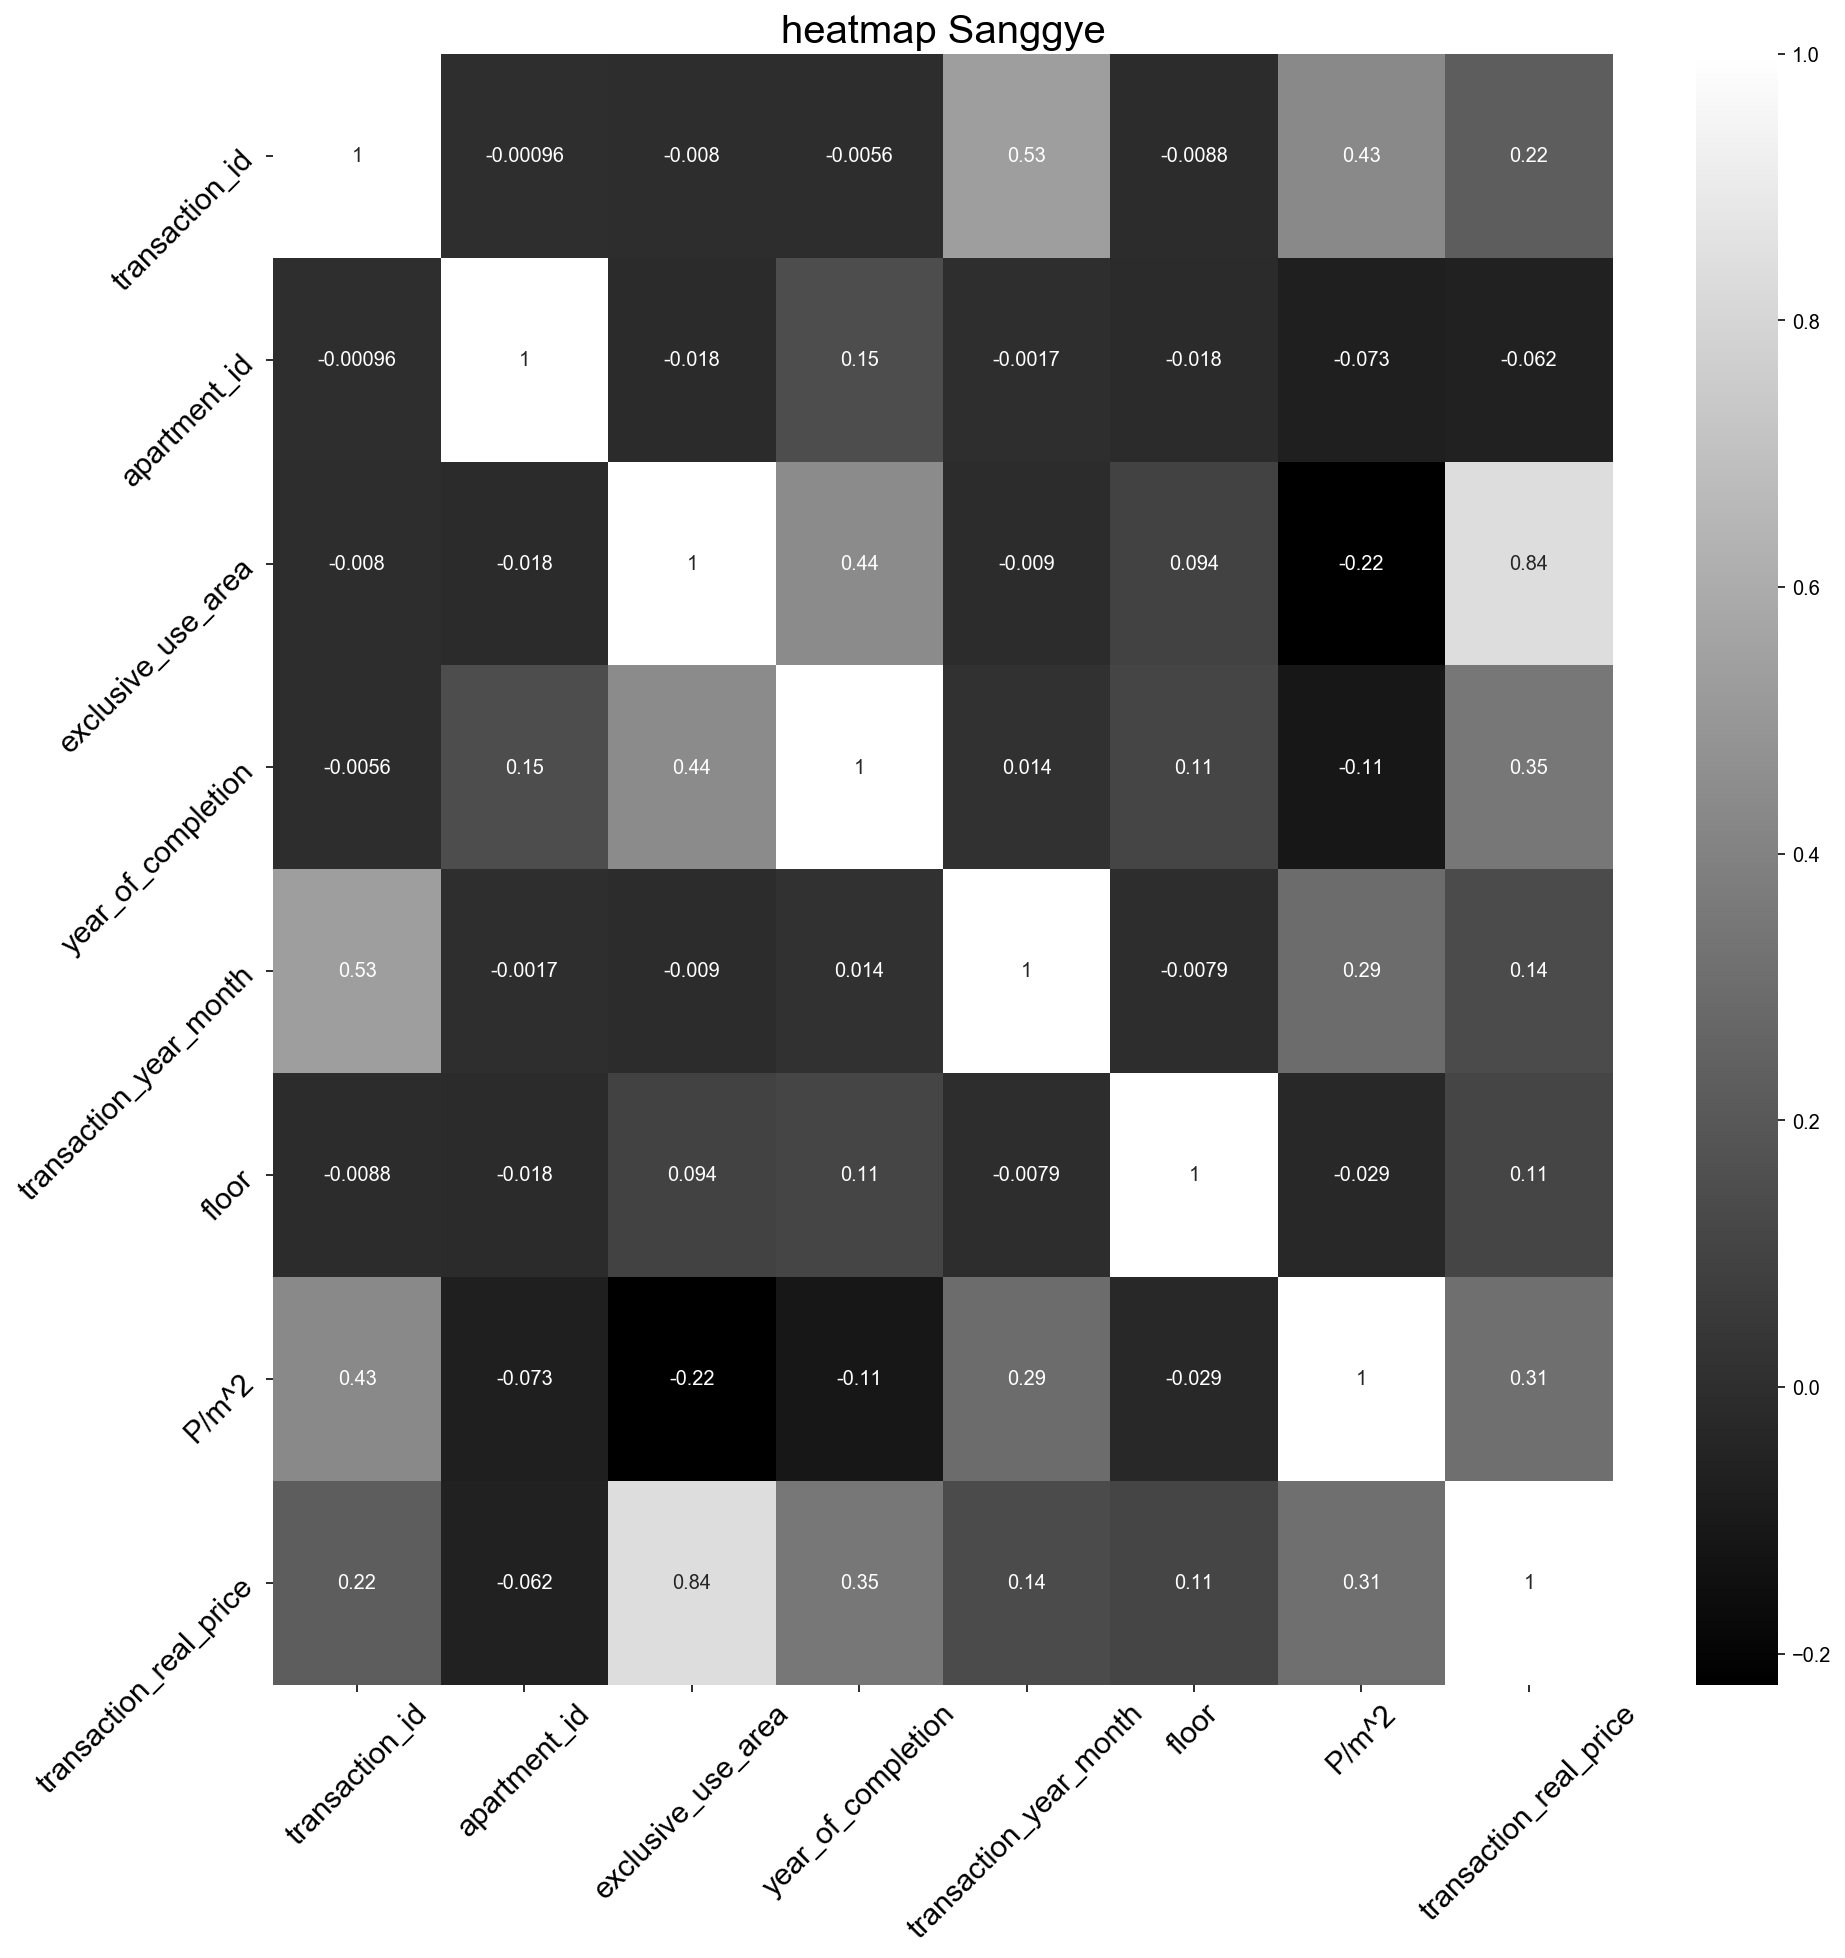

In [70]:
plt.figure(figsize=(15, 15))
sns.heatmap(train[train['dong'] == '상계동'].corr(), cmap="gray", annot=True)
plt.title('heatmap Sanggye', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

In [9]:
df1 = pd.DataFrame(train, columns=['city', 'dong', 'transaction_real_price','transaction_id','apartment_id','jibun',
                                  'apt','addr_kr', 'exclusive_use_area', 'year_of_completion', 'transaction_year_month',
                                  'transaction_date', 'floor', 'P/m^2'])

In [10]:
s_pivot = pd.pivot_table(df1, index=["city","dong"],values=["transaction_real_price"], aggfunc = ['mean','median','min','max','sum','count'])
s_pivot.xs('서울특별시')

,mean,median,min,max,sum,count
,transaction_real_price,transaction_real_price,transaction_real_price,transaction_real_price,transaction_real_price,transaction_real_price
dong,,,,,,
가락동,54967.955681,54000.0,1500,131500,525878432,9567
가리봉동,24241.186441,25000.0,13000,32300,1430230,59
가산동,26812.244082,27300.0,8889,58450,32844999,1225
가양동,32263.930082,29000.0,10000,115000,213651745,6622
갈월동,48662.500000,51500.0,30000,63000,389300,8
...,...,...,...,...,...,...
효창동,51399.878378,48000.0,14500,123000,22821546,444
후암동,49870.036496,45750.0,8000,120000,13664390,274


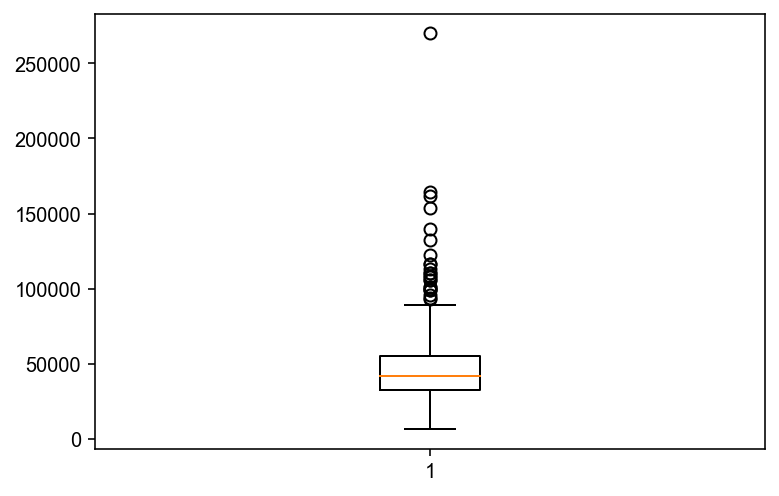

In [11]:
plt.boxplot(s_pivot.xs('서울특별시')["mean"])
plt.show()

 <img src="./datas/pieris.png" style="width:30%;">

In [12]:
groupby_min = pd.DataFrame(df1.groupby("dong").transaction_real_price.min())

In [13]:
groupby_min.rename(columns={'transaction_real_price' : 'min'}, inplace=True)

In [14]:
groupby_max = pd.DataFrame(df1.groupby("dong").transaction_real_price.max())

In [15]:
groupby_max.rename(columns={'transaction_real_price' : 'max'}, inplace=True)

In [16]:
groupby_mean = pd.DataFrame(df1.groupby("dong").transaction_real_price.mean())

In [17]:
groupby_mean.rename(columns={'transaction_real_price' : 'mean'}, inplace=True)

In [18]:
groupby_df1 = pd.concat([groupby_max, groupby_mean, groupby_min], axis=1)

In [19]:
groupby_df1['sort'] = groupby_df1['max'] - groupby_df1['min']

In [20]:
groupby_count = pd.DataFrame(df1.groupby("dong").transaction_real_price.count())

In [21]:
groupby_df1['count'] = groupby_count

In [22]:
groupby_df1

,max,mean,min,sort,count
dong,,,,,
가락동,131500,54967.955681,1500,130000,9567
가리봉동,32300,24241.186441,13000,19300,59
가산동,58450,26812.244082,8889,49561,1225
가야동,52500,20207.466579,2200,50300,3785
가양동,115000,32263.930082,10000,105000,6622
...,...,...,...,...,...
효창동,123000,51399.878378,14500,108500,444
후암동,120000,49870.036496,8000,112000,274
휘경동,64500,34295.183976,9091,55409,2696


In [23]:
groupby_df1.sort_values(by = 'sort', inplace=True)

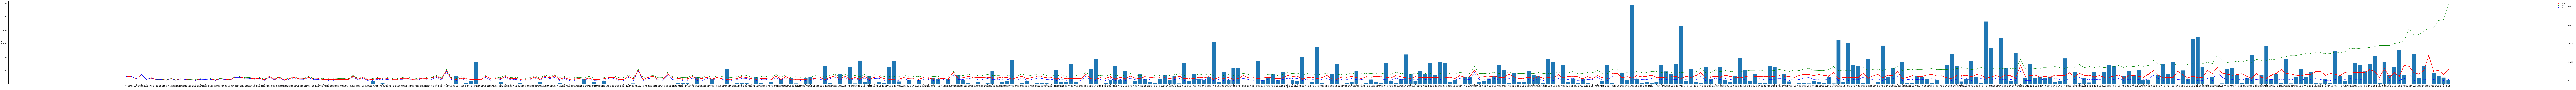

In [72]:
X = groupby_df1.index
y = groupby_df1

fig, ax1 = plt.subplots(figsize=(300,10))
ax1.set_xlabel('동')
ax1.set_ylabel('Count')
ax2 = ax1.twinx()
ax2.set_ylabel('Price')


ax2.plot(X, y['mean'],label='mean', color='r', marker='o',linewidth=3)
ax2.plot(X, y['max'], label='max', color='g', marker='*',linewidth=1)
ax2.plot(X, y['min'], label='min', color='b', marker='*',linewidth=1)
ax1.bar(X, y['count'])
plt.xticks(rotation=45, fontsize=15)
plt.legend()

plt.show()

# 회귀분석을 해보자

In [24]:
from sklearn import linear_model

In [25]:
data = {'x1':df1["exclusive_use_area"],
        'x2':df1['year_of_completion'],
        'x3':df1['floor'],
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x1','x2','x3']]
y = data['y']
data

,x1,x2,x3,y
0,84.8200,2002,2,37500
1,99.1700,1973,6,20000
2,84.7400,2007,6,38500
3,146.3900,2003,15,118000
4,194.4300,2004,3,120000
...,...,...,...,...
1216548,59.8245,2012,3,22000
1216549,84.9923,2012,7,30750
1216550,84.9923,2012,9,29500
1216551,101.7400,2008,7,26700


In [26]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  367125.74435636285
b value =  [ 600.79221323 -189.17876198  232.89458693]


In [27]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean     5.199438e-10
std      2.561390e+04
min     -1.310784e+05
25%     -1.443174e+04
50%     -3.222709e+03
75%      8.439068e+03
max      6.855708e+05
Name: y, dtype: float64

In [28]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.3194554604195421


In [29]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.3194554604195421
Mean_Squared_Error =  656071224.025548
RMSE =  25613.88732749381


## dtype이 str인 데이터 중 동의 이름으로 평균치를 줘서 만들어보기

In [30]:
avg_ppm2 = df1.groupby('dong').mean()['P/m^2']

In [31]:
avg_ppm2 = pd.DataFrame(avg_ppm2)

In [32]:
avg_ppm2.sort_values('P/m^2')

,P/m^2
dong,
중앙동4가,105.928573
신선동3가,109.488959
봉래동5가,109.880225
기장읍 대변리,111.550869
신선동2가,117.630164
...,...
대치동,1199.884182
잠실동,1211.334003
반포동,1286.040375


In [33]:
a = df1.groupby('dong').mean()[['P/m^2']]

In [34]:
ppm2 = pd.DataFrame(train['dong'].replace(a.index,a['P/m^2']))
ppm2

,dong
0,544.885981
1,604.738361
2,604.738361
3,781.025430
4,781.025430
...,...
1216548,261.243529
1216549,261.243529
1216550,261.243529
1216551,261.243529


In [35]:
data = {'x1':df1["exclusive_use_area"],
        'x2':df1['year_of_completion'],
        'x3':df1['floor'],
        'x4':ppm2['dong'],
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x1','x2','x3','x4']]
y = data['y']
data

,x1,x2,x3,x4,y
0,84.8200,2002,2,544.885981,37500
1,99.1700,1973,6,604.738361,20000
2,84.7400,2007,6,604.738361,38500
3,146.3900,2003,15,781.025430,118000
4,194.4300,2004,3,781.025430,120000
...,...,...,...,...,...
1216548,59.8245,2012,3,261.243529,22000
1216549,84.9923,2012,7,261.243529,30750
1216550,84.9923,2012,9,261.243529,29500
1216551,101.7400,2008,7,261.243529,26700


In [36]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -195411.19281250596
b value =  [506.75493406  76.03645375 346.16387539  80.48932253]


In [37]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean     1.256376e-10
std      1.543106e+04
min     -1.599812e+05
25%     -6.458604e+03
50%     -1.947259e+02
75%      5.895881e+03
max      6.591594e+05
Name: y, dtype: float64

In [38]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.753000279857136


In [39]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.753000279857136
Mean_Squared_Error =  238117271.24869266
RMSE =  15431.04893546426


In [40]:
# x3(층수) 데이터 삭제

In [41]:
data = {'x1':df1["exclusive_use_area"],
        'x2':df1['year_of_completion'],
        'x4':ppm2['dong'],
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x1','x2','x4']]
y = data['y']
data

,x1,x2,x4,y
0,84.8200,2002,544.885981,37500
1,99.1700,1973,604.738361,20000
2,84.7400,2007,604.738361,38500
3,146.3900,2003,781.025430,118000
4,194.4300,2004,781.025430,120000
...,...,...,...,...
1216548,59.8245,2012,261.243529,22000
1216549,84.9923,2012,261.243529,30750
1216550,84.9923,2012,261.243529,29500
1216551,101.7400,2008,261.243529,26700


In [42]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -306637.0241871498
b value =  [514.66753024 133.0798739   80.18265529]


In [43]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean     8.345414e-12
std      1.558795e+04
min     -1.619859e+05
25%     -6.539970e+03
50%     -1.340779e+02
75%      5.977975e+03
max      6.550711e+05
Name: y, dtype: float64

In [44]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7479521248895913


In [45]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.7479521248895913
Mean_Squared_Error =  242983887.636019
RMSE =  15587.94045523715


### 계산해보자

In [46]:
data = {'x1':df1["exclusive_use_area"],
        'x3':df1['floor'],
        'x4':ppm2['dong'],
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x1','x3','x4']]
y = data['y']
data

,x1,x3,x4,y
0,84.8200,2,544.885981,37500
1,99.1700,6,604.738361,20000
2,84.7400,6,604.738361,38500
3,146.3900,15,781.025430,118000
4,194.4300,3,781.025430,120000
...,...,...,...,...
1216548,59.8245,3,261.243529,22000
1216549,84.9923,7,261.243529,30750
1216550,84.9923,9,261.243529,29500
1216551,101.7400,7,261.243529,26700


In [47]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -43815.949597503764
b value =  [510.26991428 368.62520872  80.2065849 ]


In [48]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean     3.616419e-11
std      1.544469e+04
min     -1.601884e+05
25%     -6.468807e+03
50%     -2.196643e+02
75%      5.923936e+03
max      6.598208e+05
Name: y, dtype: float64

In [49]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7525636607230297


In [50]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.7525636607230297
Mean_Squared_Error =  238538188.95956388
RMSE =  15444.681575207818


In [51]:
# x1 제외해보기

In [52]:
data = {'x2':df1['year_of_completion'],
        'x3':df1['floor'],
        'x4':ppm2['dong'], 
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x2','x3','x4']]
y = data['y']
data

,x2,x3,x4,y
0,2002,2,544.885981,37500
1,1973,6,604.738361,20000
2,2007,6,604.738361,38500
3,2003,15,781.025430,118000
4,2004,3,781.025430,120000
...,...,...,...,...
1216548,2012,3,261.243529,22000
1216549,2012,7,261.243529,30750
1216550,2012,9,261.243529,29500
1216551,2008,7,261.243529,26700


In [53]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -678349.4042633657
b value =  [334.67991084 575.42350641  87.86605184]


In [54]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean    -3.705153e-10
std      2.108406e+04
min     -1.179714e+05
25%     -9.260251e+03
50%     -1.561458e+03
75%      6.222300e+03
max      7.381317e+05
Name: y, dtype: float64

In [55]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.5388801454424201


In [56]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.5388801454424201
Mean_Squared_Error =  444537351.7926927
RMSE =  21084.054443884666


### 계산해보자
 - 혹시 과적합은 아닐까 생각해서 test 데이터를 데이콘에 제출해보았다.

In [58]:
data = {'x1':df1["exclusive_use_area"],
        'x2':df1['year_of_completion'],
        'x3':df1['floor'],
        'x4':ppm2['dong'],
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x1','x2','x3','x4']]
y = data['y']
data

,x1,x2,x3,x4,y
0,84.8200,2002,2,544.885981,37500
1,99.1700,1973,6,604.738361,20000
2,84.7400,2007,6,604.738361,38500
3,146.3900,2003,15,781.025430,118000
4,194.4300,2004,3,781.025430,120000
...,...,...,...,...,...
1216548,59.8245,2012,3,261.243529,22000
1216549,84.9923,2012,7,261.243529,30750
1216550,84.9923,2012,9,261.243529,29500
1216551,101.7400,2008,7,261.243529,26700


In [59]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -195411.19281250596
b value =  [506.75493406  76.03645375 346.16387539  80.48932253]


In [60]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean     1.256376e-10
std      1.543106e+04
min     -1.599812e+05
25%     -6.458604e+03
50%     -1.947259e+02
75%      5.895881e+03
max      6.591594e+05
Name: y, dtype: float64

In [61]:
prediction = linear_regression.predict(X = pd.DataFrame(X))

In [62]:
test = pd.read_csv('datas/test.csv')

In [63]:
test_ppm2 = pd.DataFrame(test['dong'].replace(a.index,a['P/m^2']))

In [64]:
data = {'x1':test["exclusive_use_area"],
        'x2':test['year_of_completion'],
        'x3':test['floor'],
        'x4':test_ppm2['dong'], 
       }

data = pd.DataFrame(data)

X = data[['x1','x2','x3','x4']]

data

,x1,x2,x3,x4
0,35.5500,2002,2,787.785396
1,68.7200,1977,2,268.031738
2,72.5400,1989,2,200.954587
3,111.5400,2004,10,1199.884182
4,119.6398,2014,21,205.451798
...,...,...,...,...
5458,84.0500,2003,7,666.855599
5459,84.9300,2009,4,1286.040375
5460,110.1880,2004,23,462.939627
5461,92.4400,2005,1,463.092441


In [65]:
prediction = linear_regression.predict(X = pd.DataFrame(X))

In [66]:
prediction = pd.DataFrame(prediction)

In [67]:
prediction

,0
0,38929.566121
1,12003.096093
2,9452.342939
3,113528.809515
4,42160.401395
...,...
5458,55580.478767
5459,105281.913398
5460,58027.639262
5461,41506.483800


In [68]:
Sol = pd.concat([pd.read_csv('datas/submission.csv'), prediction], axis=1)

In [69]:
Sol

,transaction_id,transaction_real_price,0
0,1145756,0,38929.566121
1,1198704,0,12003.096093
2,1222384,0,9452.342939
3,1179897,0,113528.809515
4,1223091,0,42160.401395
...,...,...,...
5458,1174640,0,55580.478767
5459,1175575,0,105281.913398
5460,1157024,0,58027.639262
5461,1136863,0,41506.483800


In [70]:
Sol = Sol.drop(columns='transaction_real_price')

In [71]:
Sol = Sol.rename(columns={0:'transaction_real_price'})

In [72]:
Sol.set_index('transaction_id')

,transaction_real_price
transaction_id,
1145756,38929.566121
1198704,12003.096093
1222384,9452.342939
1179897,113528.809515
1223091,42160.401395
...,...
1174640,55580.478767
1175575,105281.913398
1157024,58027.639262


In [73]:
Sol.to_csv('datas/Sol1.csv',encoding='UTF-8')